In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="DLZRWqPmPgXpy0mevy0T")
project = rf.workspace("hundairotemtraining").project("image-detection-dxhgd")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Image-Detection-2 in yolov8:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:00<00:00, 6068.53it/s]


### Ïò§Î•∏Ï™ΩÏóê Î∂ôÏù¥Í∏∞

üñº Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• ÏôÑÎ£å (Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå): ./syn/syn_img/combined.jpg
‚úÖ ÎùºÎ≤® Ï†ÄÏû• ÏôÑÎ£å: ./syn/syn_label/combined.txt


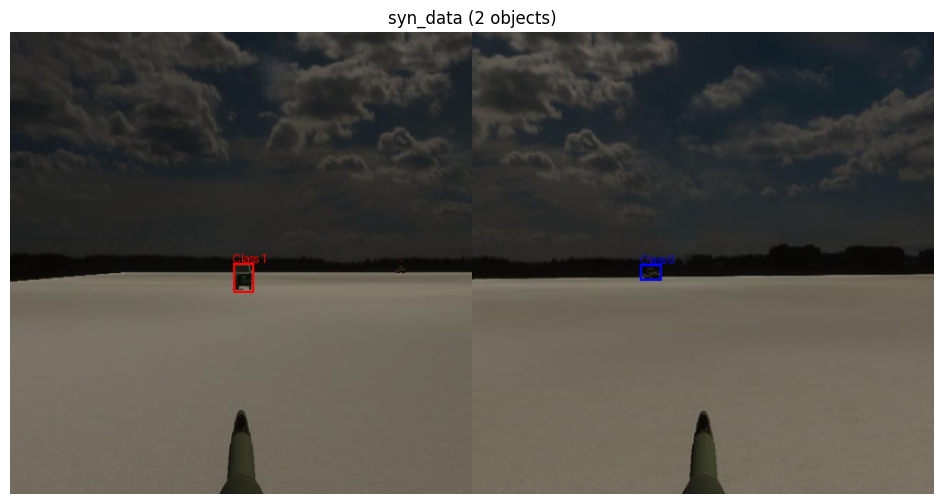

In [47]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os

# üìÇ ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
img1_path = './Image-Detection-2/train/images/capture_0000_png.rf.50333dc182c003bae1683484a09902ad.jpg'
img2_path = './Image-Detection-2/train/images/capture_0016_png.rf.6a17b5cd49216511b745314d21f21e35.jpg'
label1_path = './Image-Detection-2/train/labels/capture_0000_png.rf.50333dc182c003bae1683484a09902ad.txt'
label2_path = './Image-Detection-2/train/labels/capture_0016_png.rf.6a17b5cd49216511b745314d21f21e35.txt'

# üìÅ Ï†ÄÏû• Ìè¥Îçî Í≤ΩÎ°ú
save_dir_img = './syn/syn_img/'
save_dir_label = './syn/syn_label/'
os.makedirs(save_dir_img, exist_ok=True)
os.makedirs(save_dir_label, exist_ok=True)

# Ï†ÄÏû• ÌååÏùº Ïù¥Î¶Ñ
save_img_path = os.path.join(save_dir_img, 'combined.jpg')
save_label_path = os.path.join(save_dir_label, 'combined.txt')

# YOLO ÌòïÏãù ÎùºÎ≤® ÏùΩÍ∏∞
def read_yolo_label(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    return [list(map(float, line.strip().split())) for line in lines]

# YOLO ÏÉÅÎåÄÏ¢åÌëúÎ•º Ï†àÎåÄ Ï¢åÌëúÎ°ú Î≥ÄÌôò
def yolo_to_box(x, y, w, h, img_width, img_height):
    x_center = x * img_width
    y_center = y * img_height
    box_w = w * img_width
    box_h = h * img_height
    x_min = x_center - box_w / 2
    y_min = y_center - box_h / 2
    x_max = x_center + box_w / 2
    y_max = y_center + box_h / 2
    return [x_min, y_min, x_max, y_max]

# Ï†àÎåÄÏ¢åÌëúÎ•º YOLO Ï¢åÌëúÎ°ú Î≥ÄÌôò
def box_to_yolo(x_min, y_min, x_max, y_max, img_width, img_height):
    x_center = (x_min + x_max) / 2 / img_width
    y_center = (y_min + y_max) / 2 / img_height
    box_w = (x_max - x_min) / img_width
    box_h = (y_max - y_min) / img_height
    return [x_center, y_center, box_w, box_h]

# Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ & ÌÅ¨Í∏∞ ÎßûÏ∂îÍ∏∞
img1 = Image.open(img1_path).resize((416, 416))
img2 = Image.open(img2_path).resize((416, 416))

# Ï¢åÏö∞ Ìï©ÏÑ±
combined_img = Image.new("RGB", (832, 416))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (416, 0))

# üéØ Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏù¥ Ï†ÄÏû•Ìï† Î≥µÏÇ¨Î≥∏ ÎßåÎì§Í∏∞
combined_clean = combined_img.copy()  # Ïù¥ Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÄÏû•
draw = ImageDraw.Draw(combined_img)   # ÏãúÍ∞ÅÌôî Ïö©ÎèÑÎ°úÎßå ÏÇ¨Ïö©

# ÎùºÎ≤® Î∂àÎü¨Ïò§Í∏∞
labels1 = read_yolo_label(label1_path)
labels2 = read_yolo_label(label2_path)

# Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
draw = ImageDraw.Draw(combined_img)

# ÎùºÎ≤® Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
new_yolo_labels = []

# img1Ïùò Î∞îÏö¥Îî© Î∞ïÏä§ (Ï¢åÏ∏°)
for cls, x, y, w, h in labels1:
    # ÏõêÎûò Ïù¥ÎØ∏ÏßÄÏùò Ï¢åÏ∏° 416x416 -> Ï¢åÏö∞Ìï©ÏÑ± Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏôºÏ™Ω Ï†àÎ∞ò (Í∑∏ÎåÄÎ°ú)
    box = yolo_to_box(x * 0.5, y, w * 0.5, h, 832, 416)
    draw.rectangle(box, outline="red", width=2)
    draw.text((box[0], box[1]-10), f"Class {int(cls)}", fill="red")

    # YOLO Ï¢åÌëúÎ°ú Îã§Ïãú Î≥ÄÌôòÌïòÏó¨ Ï†ÄÏû•
    yolo_box = box_to_yolo(*box, 832, 416)
    new_yolo_labels.append([int(cls)] + yolo_box)

# img2Ïùò Î∞îÏö¥Îî© Î∞ïÏä§ (Ïö∞Ï∏°)
for cls, x, y, w, h in labels2:
    # x ÏúÑÏπò Ï°∞Ï†ï: Ïò§Î•∏Ï™ΩÏúºÎ°ú 416ÌîΩÏÖÄÎßåÌÅº Ïù¥Îèô
    new_x = 0.5 + x * 0.5
    box = yolo_to_box(new_x, y, w * 0.5, h, 832, 416)
    draw.rectangle(box, outline="blue", width=2)
    draw.text((box[0], box[1]-10), f"Class {int(cls)}", fill="blue")

    # YOLO Ï¢åÌëúÎ°ú Îã§Ïãú Î≥ÄÌôòÌïòÏó¨ Ï†ÄÏû•
    yolo_box = box_to_yolo(*box, 832, 416)
    new_yolo_labels.append([int(cls)] + yolo_box)

# Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
combined_clean.save(save_img_path)
print(f"üñº Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• ÏôÑÎ£å (Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÏùå): {save_img_path}")

# üìù YOLO ÎùºÎ≤® Ï†ÄÏû•
with open(save_label_path, 'w') as f:
    for label in new_yolo_labels:
        line = ' '.join([str(label[0])] + [f"{v:.6f}" for v in label[1:]])
        f.write(line + '\n')

print(f"‚úÖ ÎùºÎ≤® Ï†ÄÏû• ÏôÑÎ£å: {save_label_path}")

# Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Î≥¥Í∏∞
plt.figure(figsize=(12, 6))
plt.imshow(combined_img)
plt.axis('off')
plt.title("syn_data (2 objects)")
plt.show()


## ‚úÖ ÏÑ†ÌÉù Î∞∞Í≤Ω
YOLO ÎùºÎ≤® Í∏∞Î∞ò Í∞ùÏ≤¥ crop + Î∞∞Í≤Ω Ï†úÍ±∞ + Ìï©ÏÑ± Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Ï†ÑÏ≤¥ ÏΩîÎìú

### Ìï©ÏÑ± Ïù¥ÎØ∏ÏßÄ ÎùºÎ≤®ÎßÅ

1. Í∏∞Ï°¥ YOLO ÎùºÎ≤® ÌååÏùº ÏùΩÍ∏∞: Í∞Å Í∞ùÏ≤¥ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú YOLO ÎùºÎ≤® ÌååÏùºÏùÑ ÏùΩÏñ¥Îì§ÏûÖÎãàÎã§.‚Äã

2. Ìï©ÏÑ± Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞ ÌååÏïÖ: Ìï©ÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º ÌôïÏù∏Ìï©ÎãàÎã§. Ïù¥Îäî Í∞Å Í∞ùÏ≤¥Ïùò Î∞îÏö¥Îî© Î∞ïÏä§Î•º Ìï©ÏÑ± Ïù¥ÎØ∏ÏßÄÏóê ÎßûÍ≤å Î≥ÄÌôòÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌï©ÎãàÎã§.‚Äã

3. Í∞ùÏ≤¥Ïùò Î∞îÏö¥Îî© Î∞ïÏä§ ÏúÑÏπò Ï°∞Ï†ï: Í∞Å Í∞ùÏ≤¥Ïùò Î∞îÏö¥Îî© Î∞ïÏä§Î•º Ìï©ÏÑ± Ïù¥ÎØ∏ÏßÄ ÎÇ¥ÏóêÏÑúÏùò ÏúÑÏπòÏóê ÎßûÍ≤å Ï°∞Ï†ïÌï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, Îëê Î≤àÏß∏ Í∞ùÏ≤¥Îäî Ï≤´ Î≤àÏß∏ Í∞ùÏ≤¥Ïùò Ïò§Î•∏Ï™ΩÏóê Î∞∞ÏπòÎêòÏóàÎã§Î©¥, Îëê Î≤àÏß∏ Í∞ùÏ≤¥Ïùò Î∞îÏö¥Îî© Î∞ïÏä§Ïùò x Ï¢åÌëúÎ•º Ï≤´ Î≤àÏß∏ Í∞ùÏ≤¥Ïùò x Ï¢åÌëúÏôÄ Ï≤´ Î≤àÏß∏ Í∞ùÏ≤¥Ïùò ÎÑàÎπÑÎ•º ÎçîÌïú Í∞íÏúºÎ°ú Ï°∞Ï†ïÌï©ÎãàÎã§.‚Äã

4. YOLO ÎùºÎ≤® ÌååÏùº ÏÉùÏÑ±: Ï°∞Ï†ïÎêú Î∞îÏö¥Îî© Î∞ïÏä§ Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú ÏÉàÎ°úÏö¥ YOLO ÎùºÎ≤® ÌååÏùºÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§. Ïù¥Îïå, Í∞Å Í∞ùÏ≤¥Ïùò ÌÅ¥ÎûòÏä§ IDÎäî Í∏∞Ï°¥ ÎùºÎ≤® ÌååÏùºÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from rembg import remove
from PIL import Image
import os
import random

def parse_yolo_labels(img, label_path):
    h, w = img.shape[:2]
    crops = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, x_center, y_center, box_w, box_h = map(float, line.strip().split())
            x_center *= w
            y_center *= h
            box_w *= w
            box_h *= h
            x1 = int(x_center - box_w / 2)
            y1 = int(y_center - box_h / 2)
            x2 = int(x_center + box_w / 2)
            y2 = int(y_center + box_h / 2)
            x1, y1 = max(x1, 0), max(y1, 0)
            x2, y2 = min(x2, w), min(y2, h)
            crop = img[y1:y2, x1:x2]
            crops.append((crop, int(cls)))
    return crops

def remove_bg(cv2_img):
    pil_img = Image.fromarray(cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB))
    no_bg_pil = remove(pil_img)
    no_bg_cv2 = cv2.cvtColor(np.array(no_bg_pil), cv2.COLOR_RGBA2BGRA)
    return no_bg_cv2

def random_scale(image, scale_min=0.5, scale_max=1.5):
    scale_factor = random.uniform(scale_min, scale_max)
    new_size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor))
    return cv2.resize(image, new_size)

def random_rotate(image):
    angle = random.randint(0, 360)
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, mat, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0, 0))
    return rotated

def paste_transparent(background, overlay, x, y):
    bh, bw = background.shape[:2]
    oh, ow = overlay.shape[:2]
    if y + oh > bh: oh = bh - y
    if x + ow > bw: ow = bw - x
    overlay = overlay[:oh, :ow]
    alpha_overlay = overlay[:, :, 3] / 255.0
    alpha_bg = 1.0 - alpha_overlay
    for c in range(3):
        background[y:y+oh, x:x+ow, c] = (
            alpha_overlay * overlay[:, :, c] + alpha_bg * background[y:y+oh, x:x+ow, c]
        )
    return background, (x, y, x + ow, y + oh)

def convert_to_yolo_bbox(x1, y1, x2, y2, img_w, img_h):
    cx = (x1 + x2) / 2 / img_w
    cy = (y1 + y2) / 2 / img_h
    w = (x2 - x1) / img_w
    h = (y2 - y1) / img_h
    return cx, cy, w, h

def compose_multi_object_images(
    image_paths,
    label_paths,
    background_path=None,
    save_img_path="./syn/syn_img/syn.png",
    save_label_path="./syn/syn_label/syn.txt",
    scale_min=0.5,
    scale_max=1.5,
    show_bbox=True
):
    assert len(image_paths) == len(label_paths), "Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® ÏàòÍ∞Ä ÏùºÏπòÌï¥Ïïº Ìï©ÎãàÎã§."

    # Î∞∞Í≤Ω Ïù¥ÎØ∏ÏßÄ ÏÑ§Ï†ï
    if background_path and os.path.exists(background_path):
        bg = cv2.imread(background_path)
        bg = cv2.cvtColor(bg, cv2.COLOR_BGR2BGRA)
        print(f"üñº ÏÇ¨Ïö©Ïûê Î∞∞Í≤Ω ÏÇ¨Ïö©: {background_path}")
    else:
        bg = np.ones((600, 1000, 4), dtype=np.uint8) * 255
        print("üñº Í∏∞Î≥∏ Ìù∞ Î∞∞Í≤Ω ÏÇ¨Ïö©")

    composed = bg.copy()               # Ï†ÄÏû•Ïö© (bbox ÏóÜÏùå)
    composed_vis = composed.copy()     # ÏãúÍ∞ÅÌôîÏö© (bbox ÌëúÏãúÏö©)

    img_h, img_w = composed.shape[:2]
    current_x, current_y = 50, 50
    max_row_height = 0
    yolo_labels = []

    for img_path, label_path in zip(image_paths, label_paths):
        img = cv2.imread(img_path)
        crops = parse_yolo_labels(img, label_path)

        for crop_img, cls in crops:
            crop_img = random_scale(crop_img, scale_min, scale_max)
            crop_img = random_rotate(crop_img)
            no_bg = remove_bg(crop_img)
            h, w = no_bg.shape[:2]

            if current_x + w > img_w - 50:
                current_x = 50
                current_y += max_row_height + 20
                max_row_height = 0

            composed, (x1, y1, x2, y2) = paste_transparent(composed, no_bg, current_x, current_y)
            composed_vis, _ = paste_transparent(composed_vis, no_bg, current_x, current_y)

            # YOLO ÎùºÎ≤® Ï†ÄÏû•Ïö© bbox
            cx, cy, bw, bh = convert_to_yolo_bbox(x1, y1, x2, y2, img_w, img_h)
            yolo_labels.append(f"{cls} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}")

            # ÏãúÍ∞ÅÌôîÏö© bboxÎßå Í∑∏Î¶¨Í∏∞
            if show_bbox:
                cv2.rectangle(composed_vis, (x1, y1), (x2, y2), (0, 0, 255, 255), 2)

            current_x += w + 20
            max_row_height = max(max_row_height, h)

    # Ï†ÄÏû•
    os.makedirs(os.path.dirname(save_img_path), exist_ok=True)
    os.makedirs(os.path.dirname(save_label_path), exist_ok=True)
    cv2.imwrite(save_img_path, composed)  # Î∞îÏö¥Îî© Î∞ïÏä§ ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    with open(save_label_path, 'w') as f:
        f.write("\n".join(yolo_labels))

    print(f"‚úÖ Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• ÏôÑÎ£å (bbox ÏóÜÏùå): {save_img_path}")
    print(f"‚úÖ ÎùºÎ≤® Ï†ÄÏû• ÏôÑÎ£å: {save_label_path}")

    # ÏãúÍ∞ÅÌôî
    plt.imshow(cv2.cvtColor(composed_vis, cv2.COLOR_BGRA2RGBA))
    plt.axis('off')
    plt.title("Synthetic Image (with bbox)")
    plt.show()


üñº ÏÇ¨Ïö©Ïûê Î∞∞Í≤Ω ÏÇ¨Ïö©: ./etc_data/bg_img/dust.jpeg
‚úÖ Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• ÏôÑÎ£å (bbox ÏóÜÏùå): ./syn/syn_img/syn_01.png
‚úÖ ÎùºÎ≤® Ï†ÄÏû• ÏôÑÎ£å: ./syn/syn_label/syn_01.txt


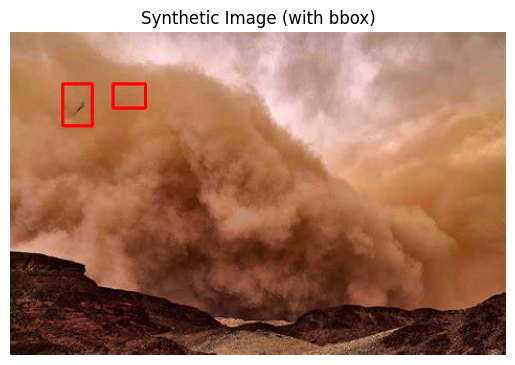

In [76]:
image_paths = ['./Image-Detection-2/train/images/capture_0000_png.rf.50333dc182c003bae1683484a09902ad.jpg'
,  './Image-Detection-2/train/images/capture_0016_png.rf.6a17b5cd49216511b745314d21f21e35.jpg']
label_paths = ['./Image-Detection-2/train/labels/capture_0000_png.rf.50333dc182c003bae1683484a09902ad.txt', './Image-Detection-2/train/labels/capture_0016_png.rf.6a17b5cd49216511b745314d21f21e35.txt'
]
bg_path = "./etc_data/bg_img/dust.jpeg"

compose_multi_object_images(
    image_paths,
    label_paths,
    background_path=bg_path,
    save_img_path="./syn/syn_img/syn_01.png",
    save_label_path="./syn/syn_label/syn_01.txt",
    scale_min=0.8,
    scale_max=1.2,
    show_bbox=True
)

ÏÇ¨Î¨ºÏù∏Ïãù ÌÖåÏä§Ìä∏

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

def detect_and_plot_yolov8(image_path, model_name='yolov8x.pt', conf=0.3):
    # 1. Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
    model = YOLO(model_name)

    # 2. Ïù¥ÎØ∏ÏßÄ ÏòàÏ∏°
    results = model(image_path, conf=conf)

    # 3. Î∞îÏö¥Îî© Î∞ïÏä§Í∞Ä Í∑∏Î†§ÏßÑ Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ ÏñªÍ∏∞
    annotated_image = results[0].plot()

    # 4. Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("YOLOv8 Detection Result")
    plt.show()

    # 5. Î∞îÏö¥Îî© Î∞ïÏä§ Ï†ïÎ≥¥ Ï∂úÎ†•
    boxes = results[0].boxes
    for i, box in enumerate(boxes):
        cls_id = int(box.cls[0])
        conf_score = float(box.conf[0])
        xyxy = box.xyxy[0].tolist()
        print(f"[{i}] Class: {model.names[cls_id]}, Confidence: {conf_score:.2f}, Box: {xyxy}")

    return results



image 1/1 /home/hara/workspace/python-docker/Aug_dev/syn_img/syn_test1_sand.png: 448x640 (no detections), 100.7ms
Speed: 1.9ms preprocess, 100.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


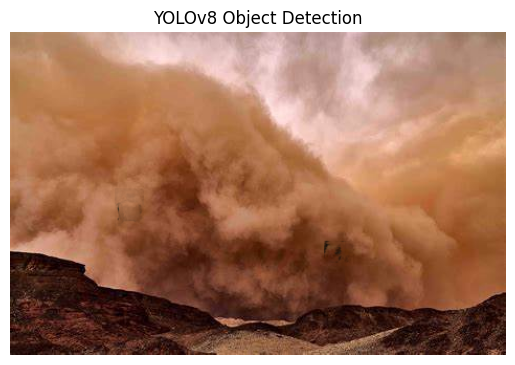

In [12]:
results = detect_objects_yolov8('./syn_img/syn_test1_sand.png')


image 1/1 /home/hara/workspace/python-docker/Aug_dev/syn_img/syn_test2_sand2.png: 448x640 1 chair, 84.9ms
Speed: 2.2ms preprocess, 84.9ms inference, 110.1ms postprocess per image at shape (1, 3, 448, 640)


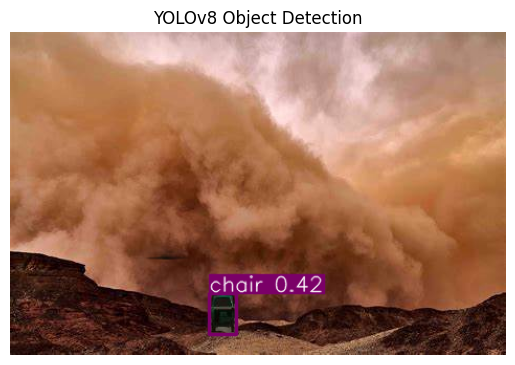

In [11]:
results = detect_objects_yolov8('./syn_img/syn_test2_sand2.png')


image 1/1 /home/hara/workspace/python-docker/Aug_dev/syn_img/syn_test5_snow.png: 448x640 1 car, 1 bench, 86.0ms
Speed: 2.1ms preprocess, 86.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


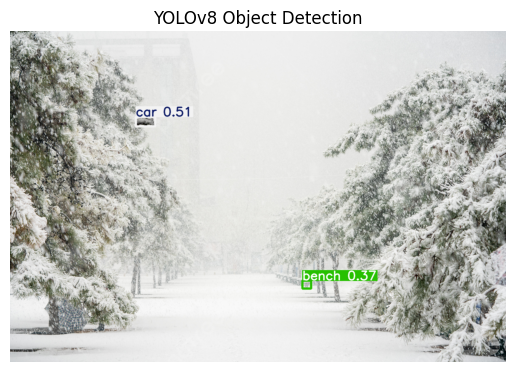

In [13]:
results = detect_objects_yolov8('./syn_img/syn_test5_snow.png')